In [1]:
import os 
os.chdir(r'C:\Users\TUF\Desktop\Major Project\Datsets\utkface_aligned_cropped')
os.chdir(r'C:\Users\TUF\Desktop\Major Project\Datsets\utkface_aligned_cropped\UTKFace')

In [15]:
onlyfiles = os.listdir()
len(onlyfiles)

23708

In [16]:
from random import shuffle
shuffle(onlyfiles)
age = [i.split('_')[0] for i in onlyfiles]

In [17]:
classes = []
for i in age:
    i = int(i)
    if i <= 14:
        classes.append(0)
    if (i>14) and (i<=25):
        classes.append(1)
    if (i>25) and (i<40):
        classes.append(2)
    if (i>=40) and (i<60):
        classes.append(3)
    if i>=60:
        classes.append(4)

In [18]:
from scipy import misc
import cv2
X_data =[]
for file in onlyfiles:
    face = cv2.imread(file)
    face =cv2.resize(face, (32, 32) )
    X_data.append(face)

In [19]:
import numpy as np 
X = np.squeeze(X_data)
X.shape

(23708, 32, 32, 3)

In [20]:
X = X.astype('float32')
X /= 255

In [21]:
from tensorflow.keras.utils import to_categorical
categorical_labels = to_categorical(classes, num_classes=5)


In [22]:
(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels[:15008]) , (X[15008:] , categorical_labels[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])

In [23]:
import tensorflow as tf 
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 32)         

In [24]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [30]:
history = model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=35,
         validation_data=(x_valid, y_valid),)

Epoch 1/35
235/235 [==============================] - 14s 58ms/step - loss: 0.7256 - accuracy: 0.6896 - val_loss: 0.8377 - val_accuracy: 0.6291
Epoch 2/35
235/235 [==============================] - 21s 88ms/step - loss: 0.7334 - accuracy: 0.6880 - val_loss: 0.8559 - val_accuracy: 0.6264
Epoch 3/35
235/235 [==============================] - 24s 101ms/step - loss: 0.7177 - accuracy: 0.6920 - val_loss: 0.8524 - val_accuracy: 0.6317
Epoch 4/35
235/235 [==============================] - 23s 97ms/step - loss: 0.7093 - accuracy: 0.6911 - val_loss: 0.8368 - val_accuracy: 0.6376
Epoch 5/35
235/235 [==============================] - 24s 102ms/step - loss: 0.7066 - accuracy: 0.6957 - val_loss: 0.8477 - val_accuracy: 0.6283
Epoch 6/35
235/235 [==============================] - 23s 98ms/step - loss: 0.7052 - accuracy: 0.7009 - val_loss: 0.8524 - val_accuracy: 0.6284
Epoch 7/35
235/235 [==============================] - 22s 95ms/step - loss: 0.7018 - accuracy: 0.6971 - val_loss: 0.8336 - val_accurac

In [31]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (16.0, 10.0)
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer

def plot_accuracy(history):
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']
    plt.plot(training_accuracy,'r',linewidth=3.0)
    plt.plot(validation_accuracy,'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

def plot_loss(history):
  
  training_loss = history.history['loss']
  validation_loss = history.history['val_loss']
  plt.plot(training_loss,'m',linewidth=3.0)
  plt.plot(validation_loss,'c',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)
  plt.show()

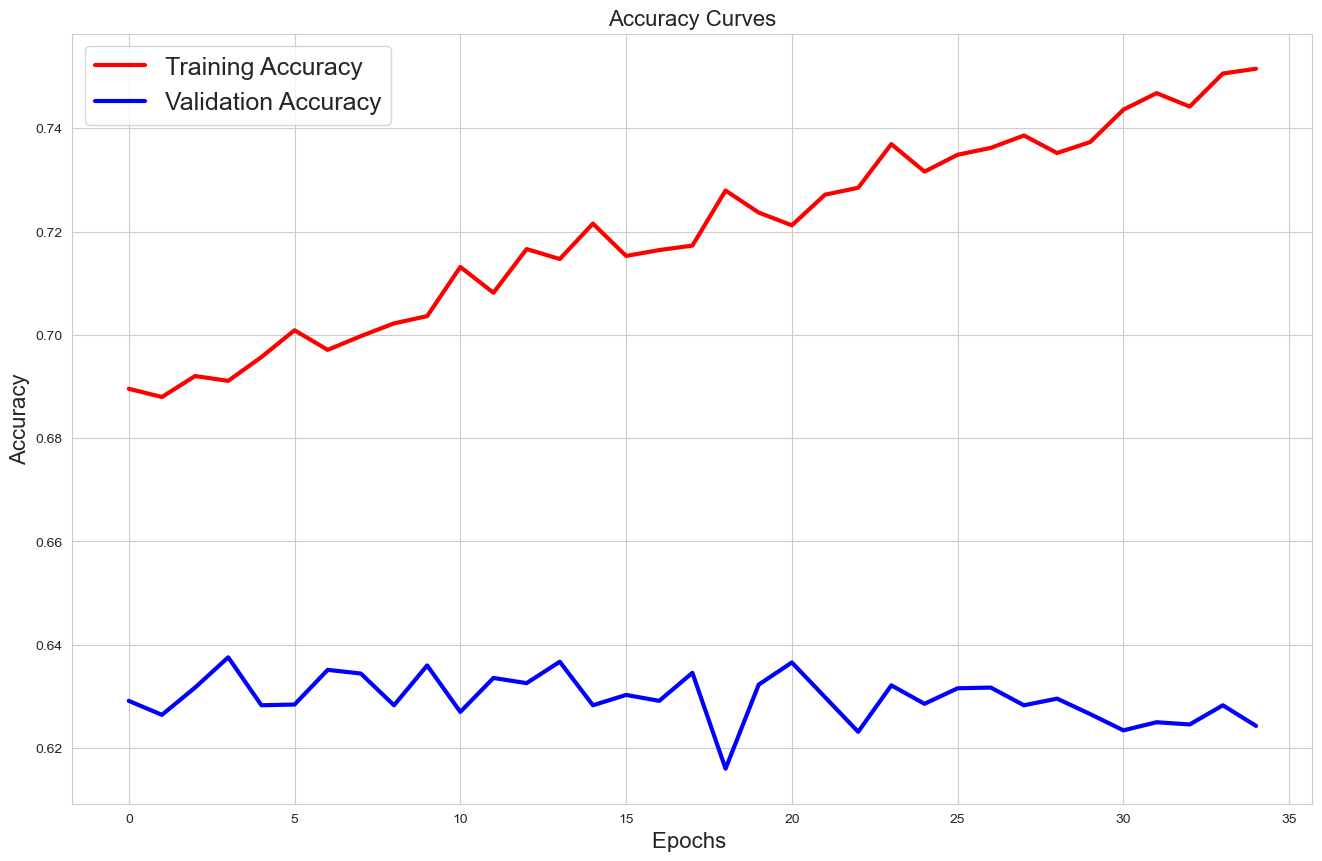

In [32]:
plot_accuracy(history)

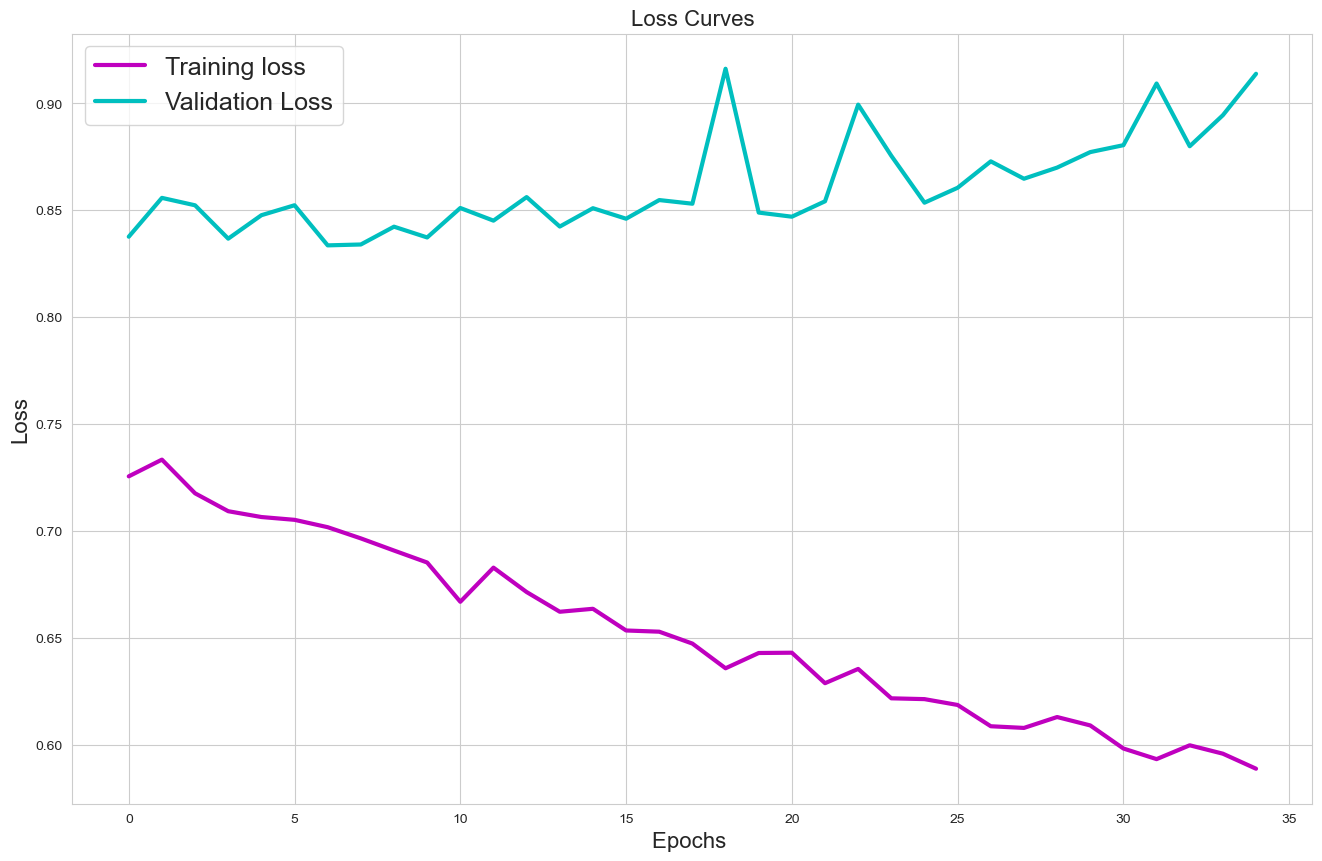

In [33]:
plot_loss(history)

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [35]:
# model.save('./Model/AgeV2.h5')

In [41]:
model.save(f"C/Users/TUF/Desktop/Major Project/output/age_model.h5", save_format='h5')